In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [3]:
def eiler(func, x0, xf, y0, h, args=()):
    count = int((xf - x0) / h) + 1
    y = np.zeros((count, y0.shape[0]))
    x, y[0] = x0, y0[:].copy()
    for i in range(1, count):
        right_parts = func(x, y[i-1], *args)
        for j in range(len(y0)):
            y[i][j] = y[i-1][j] + h * right_parts[j]
        x += h
    return y

In [4]:
def rk(func, x0, xf, y0, h, args=()):
    count = int((xf - x0) / h) + 1
    y = np.zeros((count, y0.shape[0]))
    x, y[0] = x0, y0[:].copy()
    for i in range(1, count):
        k1 = func(x, y[i-1], *args)
        k2 = func(x + h / 2, [y + k * h / 2 for y, k in zip(y[i-1], k1)], *args)
        k3 = func(x + h / 2, [y + k * h / 2 for y, k in zip(y[i-1], k2)], *args)
        k4 = func(x + h, [y + k * h for y, k in zip(y[i-1], k3)], *args)
        for j in range(len(y0)):
            y[i][j] = y[i-1][j] + h / 6 * (k1[j] + 2 * k2[j] + 2 * k3[j] + k4[j])
        x += h
    return y

In [5]:
def func(time: float, c: np.ndarray, 
         k: np.ndarray) -> np.ndarray:
    ca, cb, cc = c
    k1, k2, k3, k4 = k
    r1, r2, r3, r4 = [
        k1 * ca,
        k2 * cb ** 2,
        k3 * cb ** 2,
        k4 * cc,
    ]
    dca_dt = -r1 + r2
    dcb_dt = 2 * (r1 - r2 - r3 + r4)
    dcc_dt = r3 - r4

    return dca_dt, dcb_dt, dcc_dt

In [75]:
k, y0 = np.array([.5, .8, .95, .1]), np.array([1, .0, .0])
t0, tf, h = 0, 10, .5
y_eiler = eiler(func, t0, tf, y0, h, args=(k, ))
y_rk = rk(func, t0, tf, y0, h, args=(k, ))
t = np.arange(t0, tf+h, h)

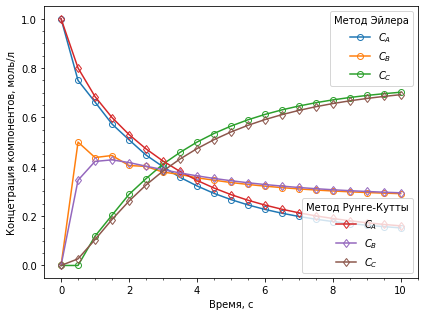

In [100]:
f, a = plt.subplots(figsize=(6, 4.5))

line1, = a.plot(t, y_eiler[:, 0], marker='o', fillstyle='none', label=r'$C_A$')
line2, = a.plot(t, y_eiler[:, 1], marker='o', fillstyle='none', label=r'$C_B$')
line3, = a.plot(t, y_eiler[:, 2], marker='o', fillstyle='none', label=r'$C_C$')

line4, = a.plot(t, y_rk[:, 0], marker='d', fillstyle='none', label=r'$C_A$')
line5, = a.plot(t, y_rk[:, 1], marker='d', fillstyle='none', label=r'$C_B$')
line6, = a.plot(t, y_rk[:, 2], marker='d', fillstyle='none', label=r'$C_C$')

a.set_xlabel('Время, с')
a.set_ylabel('Концетрация компонентов, моль/л')

a.xaxis.set_minor_locator(AutoMinorLocator())
a.yaxis.set_minor_locator(AutoMinorLocator())

first_legend = a.legend(
    handles=[line1, line2, line3], 
    loc='upper right', 
    title='Метод Эйлера'
)
a.add_artist(first_legend)

a.legend(
    handles=[line4, line5, line6],
    loc='lower right',
    title='Метод Рунге-Кутты',
)

plt.tight_layout()
plt.savefig(r'..\pics\plot.pdf')